In [1]:
%matplotlib inline
from IPython.core.display import display
from itertools import combinations
from tqdm import tqdm_notebook as tqdm
import pickle
import pandas
import numpy

In [6]:
with open('final_tree.pkl', 'rb') as f:
    final_tree = pickle.load(f)
use_cols = ['cnum', 'pred', 'new', 'vmax', 'vmin', 'vavg']

In [3]:
df = pandas.read_csv('../data/test.csv')
submit = pandas.read_csv('submit.csv')
df['pred'] = submit['is_duplicate'].values

df2 = pandas.read_csv('../data/train.csv')
pos_rate = df2['is_duplicate'].sum() / df2.shape[0]
df2['pred'] = df2['is_duplicate'] / pos_rate * 0.165


import networkx as nx
from itertools import combinations
G = nx.Graph()

#edges = [tuple(x) for x in df[['question1', 'question2', 'pred']].values]
#G.add_weighted_edges_from(edges)
map_score = dict(((x[0], x[1]), x[2]) for x in df[['question1', 'question2', 'pred']].values)

#edges = [tuple(x) for x in df2[['question1', 'question2', 'pred']].values]
#G.add_weighted_edges_from(edges)
map_score2 = dict(((x[0], x[1]), x[2]) for x in df2[['question1', 'question2', 'pred']].values)
map_score.update(map_score2)
edges = [(k[0], k[1], v) for k, v in map_score.items()]
G.add_weighted_edges_from(edges)

import copy
cnt = 0
cliques = sorted(list(nx.find_cliques(G)), key=len) 

In [4]:
map_result = copy.deepcopy(map_score)
map_cnum = {}
map_data = {}

for cli in tqdm(cliques):
    #if len(cli) < 2:
    #    continue
    if len(cli) == 1:
        q1 = cli[0]
        print(q1)
        map_result[q1, q1] = 1.
        map_cnum[q1, q1] = 1
        map_data[q1, q1] = (1., 1., 1.)
        continue
    keys = {}
    for q1, q2 in combinations(cli, 2):
        if (q1, q2) in map_score:
            keys[q1, q2] = map_score[q1, q2]
        elif (q2, q1) in map_score:
            keys[q2, q1] = map_score[q2, q1]
        elif (q1, q2) in map_score2:
            keys[q1, q2] = map_score2[q1, q2]
        elif (q2, q1) in map_score2:
            keys[q2, q1] = map_score2[q2, q1]
        else:
            raise Exception('no edge {}'.format((q1, q2)))
    val_max = numpy.max(list(keys.values()))
    val_min = numpy.min(list(keys.values()))
    val_avg = numpy.mean(list(keys.values()))
    if val_avg > 0.4:#avg_pos:
        val = val_max
        keys = {k: numpy.max([val, map_result[k]]) for k in keys}
    elif val_avg > 0.05:
        val = val_avg
        keys = {k: numpy.max([val, map_result[k]]) for k in keys}
    else:
        val = val_min
        keys = {k: numpy.min([val, map_result[k]]) for k in keys}

    map_result.update(keys)
    keys = {k: len(cli) for k in keys}
    map_cnum.update(keys)
    keys = {k: (val_max, val_min, val_avg) for k in keys}
    map_data.update(keys)

What is the police code?
What is in cricket?
What spiritual?
What training?
What is annual revenue?
What are the best dating in India?
What is boot?
What does the Malayalam word mean?
I universe?
How do going to gym?
How you've had sex?
What is the difference between middle school and high school?
How would you Google Maps?
What is hedge fund have its back office operations in-house or outsourced to a fund admin?



In [7]:
list_val = []
list_data = []
for q1, q2 in tqdm(df[['question1', 'question2']].values):
    key = (q1, q2)
    new_pred = map_result[q1, q2]
    if key not in map_cnum:
        map_cnum[q1, q2] = 1
        map_data[q1, q2] = (new_pred, new_pred, new_pred)
    list_val.append(map_result[q1, q2])
    cnum = map_cnum.get((q1, q2), -1)
    data = list(map_data[q1, q2])
    pred = map_score[key]
    
    #'cnum', 'pred', 'new', 'vmax','vmin', 'vavg'
    list_data.append([cnum, pred, new_pred] + data)
    
list_data = pandas.DataFrame(list_data, columns=['cnum', 'pred', 'new', 'vmax','vmin', 'vavg'])[use_cols].values
if list_data.shape[1] != final_tree.feature_importances_.shape[0]:                                                                                                                                                                                                                                           
    raise Exception('Not match feature num: %s %s' % (x_test.shape[1], n_features))  
    
pred = final_tree.predict_proba(list_data)[:, 1]
submit['is_duplicate'] = pred#list_val
submit.to_csv('submit_clique.csv', index=False)

In [8]:
map_dup = dict(((x[0], x[1]), x[2]) for x in df2[['question1', 'question2', 'is_duplicate']].values)
list_res = []
for key, new in map_score2.items():
    new = map_result[key]
    try:
        label = map_dup[key]
    except:
        continue
    pred = map_score2[key]
    new_pred = new
    data = list(map_data.get(key, (0, 0, 0)))
    new_pred = new
    cnum = map_cnum.get(key, 0)
    list_res.append([cnum, label, pred, new_pred] + data)

aaa = pandas.DataFrame(list_res, columns=['cnum', 'label', 'pred', 'new', 'vmax', 'vmin', 'vavg'])
from tfidf_k import calc_weight
from sklearn.metrics import log_loss, roc_auc_score
sw = calc_weight(aaa['label'].values)
print(roc_auc_score(aaa['label'].values, aaa['pred'].values, sample_weight=sw))
print(log_loss(aaa['label'].values, aaa['pred'].values, sample_weight=sw))
print(roc_auc_score(aaa['label'].values, aaa['new'].values, sample_weight=sw))
print(log_loss(aaa['label'].values, aaa['new'].values, sample_weight=sw))

/home/um003367/.pyenv/versions/anaconda3-4.1.1/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


1.0
0.132888890229
0.99937155985
0.112793364804


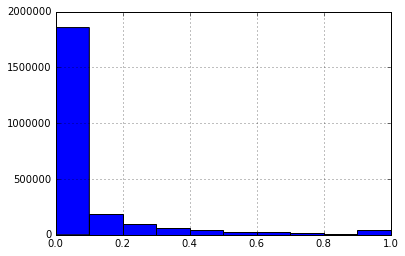

In [11]:
bbb = pandas.DataFrame(list_data, columns=use_cols)

pred = final_tree.predict_proba(bbb[use_cols])[:, 1]
bbb['new2'] = pred
display(bbb['new2'].hist())

In [12]:
bbb

,cnum,pred,new,vmax,vmin,vavg,new2
0,2.0,0.000478,0.000478,0.000478,0.000478,0.000478,0.000197
1,2.0,0.040632,0.040632,0.040632,0.040632,0.040632,0.031518
2,2.0,0.039210,0.039210,0.039210,0.039210,0.039210,0.031874
3,2.0,0.000264,0.000264,0.000264,0.000264,0.000264,0.000005
4,2.0,0.138151,0.138151,0.138151,0.138151,0.138151,0.115495
5,2.0,0.001533,0.001533,0.001533,0.001533,0.001533,0.000457
6,22.0,0.537002,0.981715,0.981715,0.080261,0.712157,0.993234
7,2.0,0.994366,0.994366,0.994366,0.994366,0.994366,0.633307
8,2.0,0.148714,0.148714,0.148714,0.148714,0.148714,0.116831
9,2.0,0.000504,0.000504,0.000504,0.000504,0.000504,0.000145


In [15]:
pred = final_tree.predict_proba(aaa[use_cols])[:, 1]
aaa['new2'] = pred
print(roc_auc_score(aaa['label'].values, aaa['new2'].values, sample_weight=sw))
print(log_loss(aaa['label'].values, aaa['new2'].values, sample_weight=sw))

0.999999258894
0.081701941368


In [16]:
print(roc_auc_score(aaa['label'].values, aaa['pred'].values, sample_weight=sw))
print(log_loss(aaa['label'].values, aaa['pred'].values , sample_weight=sw))
print(roc_auc_score(aaa['label'].values, aaa['new'].values, sample_weight=sw))
print(log_loss(aaa['label'].values, aaa['new'].values, sample_weight=sw))

1.0
0.132888890229
0.99937155985
0.112793364804


In [ ]:
1.0
0.132888890229
0.992404179579
0.120067132942